In [35]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import dateutil
import numpy as np

In [3]:
%matplotlib inline

In [4]:
Session = sessionmaker()
engine = create_engine('sqlite:///ztis.db')

In [5]:
feeds = pd.read_sql_query('SELECT * FROM ztis', engine)
print("There are %d news in database." % (feeds.shape[0]))
feeds[10:15]

There are 11881 news in database.


id source                                              title  \
10  11  BBC\n  UKIP candidate Carl Benjamin in Truro milkshak...   
11  12  BBC\n  Labour's Richard Burgon pressed over Zionism r...   
12  13  BBC\n  Emergency services radio system '£3.1bn over b...   
13  14  BBC\n  New post-Brexit immigration plan 'needed for S...   
14  15  BBC\n  Benefit penalties cut by Amber Rudd for claima...   

                                              summary  \
10  A man was pulled to the ground after attemptin...   
11  The shadow justice secretary denies lying abou...   
12  The Home Office is criticised for failing to d...   
13  The head of the CBI calls for a lower minimum ...   
14  Claimants who fail to follow rules can now onl...   

                 publication_date   author  
10  Fri, 10 May 2019 15:03:20 GMT  default  
11  Fri, 10 May 2019 08:29:13 GMT  default  
12  Fri, 10 May 2019 01:34:16 GMT  default  
13  Thu, 09 May 2019 23:55:27 GMT  default  
14  Thu, 09 May 2019 16:41:42 GMT  default

In [6]:

feedsDistribution = pd.read_sql_query('SELECT source, COUNT(id) AS news \
FROM ztis \
GROUP BY source \
ORDER BY COUNT(id) DESC', engine)
feedsDistribution

source  news
0               US News\n  3760
1        CBS News - USA\n   834
2           Japan Times\n   636
3     CNN - Top Stories\n   623
4        ABC News - USA\n   622
5   The Daily Telegraph\n   586
6    New Zealand Herald\n   550
7              Fox News\n   530
8               Reuters\n   522
9              NBC News\n   496
10  The Times of Israel\n   400
11      Washington Post\n   337
12         The Guardian\n   336
13                  BBC\n   288
14          Yahoo - USA\n   218
15                  NPR\n   202
16       Times of India\n   152
17            NewYorker\n   119
18         PoliticsHome\n   108
19             Le Monde\n    82
20         CNN - Europe\n    72
21                Salon\n    58
22         CNN - Africa\n    52
23           CNN - Asia\n    47
24             The Time\n    45
25        Yahoo - World\n    44
26          China Daily\n    42
27       CNN - Americas\n    33
28    CNN - Middle East\n    32
29    Atlantic National\n    25
30    The Atlantic Wire\n    20
31             Politico\n    10

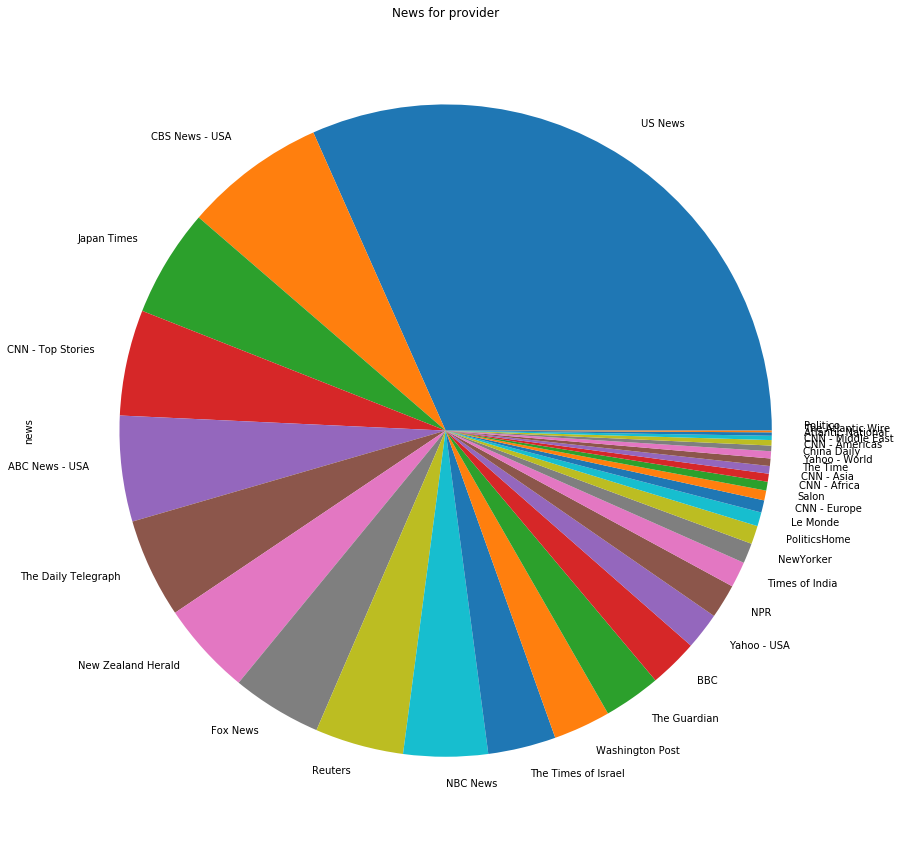

In [7]:
feedPie = feedsDistribution[["source", "news"]].set_index('source')
feedPie.plot.pie('news',figsize=(15, 15), title="News for provider", legend=False)

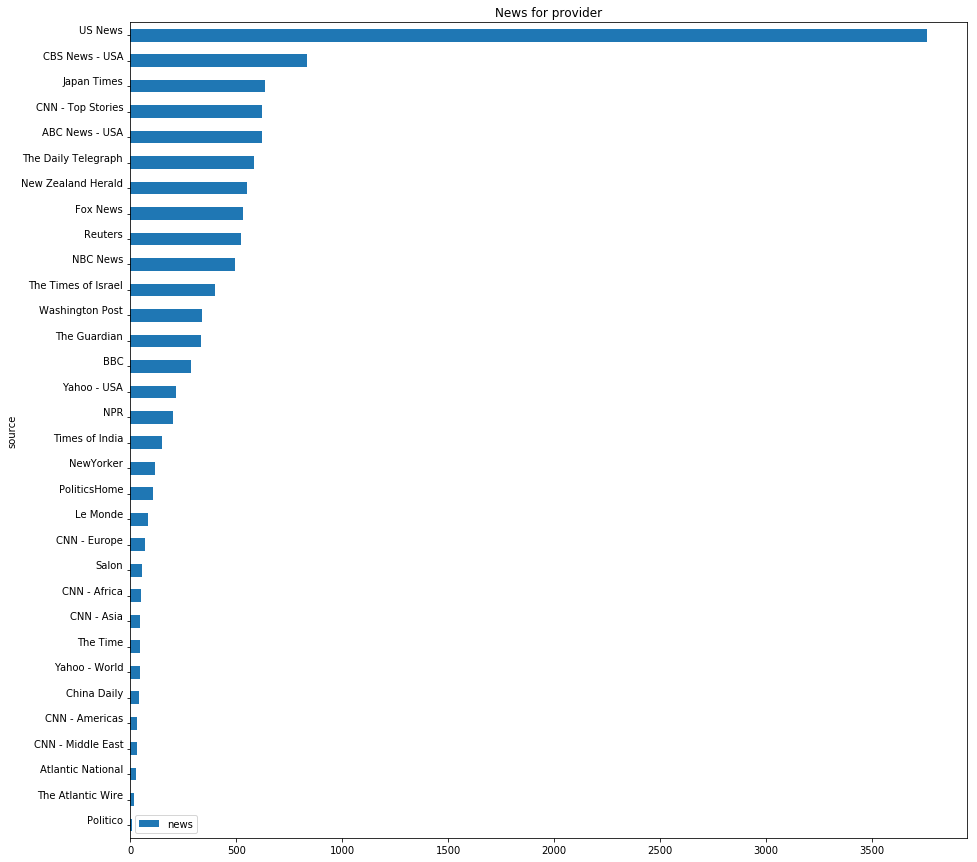

In [8]:
feedsDistribution.plot.barh("source", figsize=(15, 15), title="News for provider").invert_yaxis()

In [9]:
feedsDate = pd.read_sql_query('SELECT publication_date AS date, \
COUNT(DISTINCT id) AS news_per_day \
FROM ztis \
GROUP BY publication_date', engine)
print(feedsDate["news_per_day"].sum())
print(feedsDate.shape)

11881
(11172, 2)


In [10]:
def pars_date_with_def(x):
    if(x == "default"):
        return "default"
    else:
        return dateutil.parser.parse(x).date()

In [11]:
feedsDate['date'] = [pars_date_with_def(x) for x in feedsDate['date']]

C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [12]:
groupedFeedDate = feedsDate.groupby('date').sum()
print(groupedFeedDate["news_per_day"].sum())
groupedFeedDate.shape

11881


(164, 1)

In [13]:
limitedFeedsDate = groupedFeedDate.drop(groupedFeedDate[groupedFeedDate['news_per_day'] < 30].index)
limitedFeedsDate

news_per_day
date                    
2019-05-08            36
2019-05-09            79
2019-05-10           121
2019-05-11           127
2019-05-12           214
2019-05-13           303
2019-05-14          1055
2019-05-15          1461
2019-05-16          1103
2019-05-17           317
2019-05-18           996
2019-05-19           739
2019-05-20           821
2019-05-21          1154
2019-05-22          1148
2019-05-23          1097
2019-05-24           601
default              185

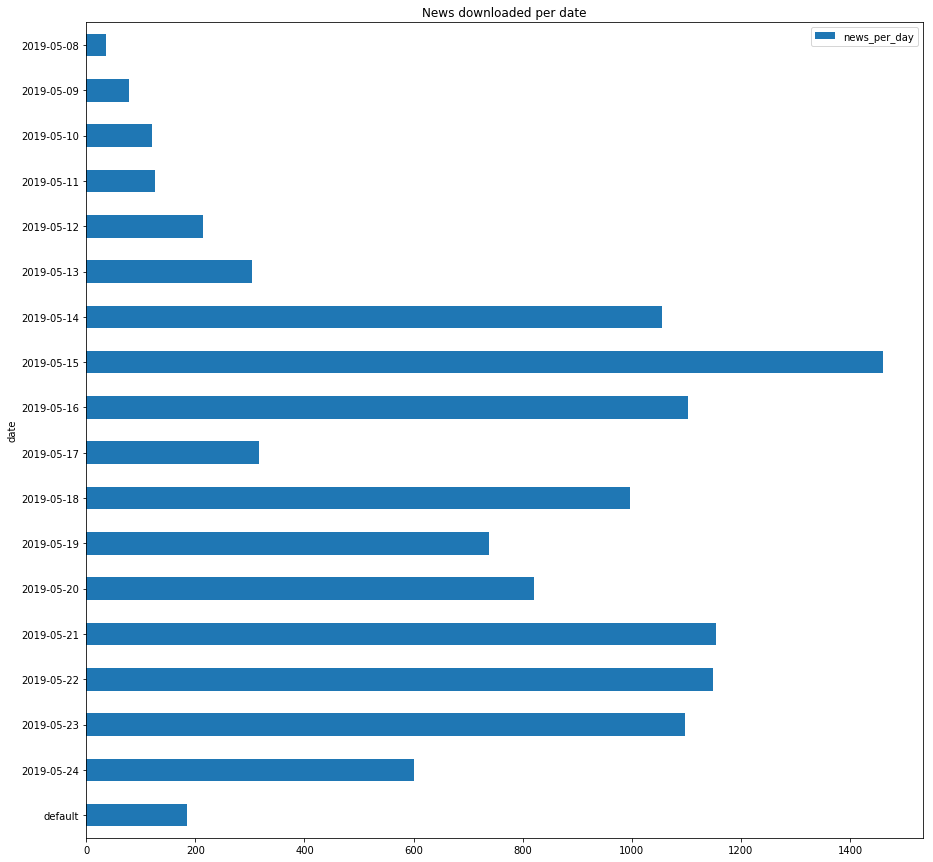

In [14]:
limitedFeedsDate.plot.barh( figsize=(15, 15), title="News downloaded per date").invert_yaxis()

([<matplotlib.axis.XTick at 0x1f46f470>,
 <a list of 20 Text xticklabel objects>)

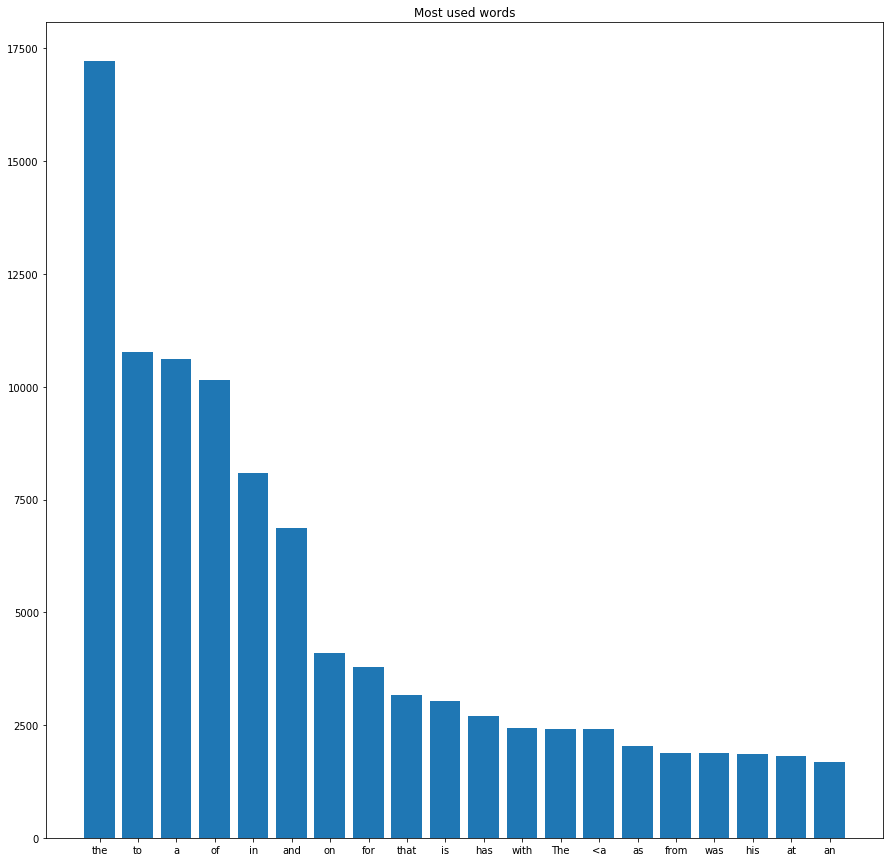

In [82]:
from collections import Counter
Ct = Counter(" ".join(feeds['summary']).split()).most_common(20)
labels, values = zip(*Counter(" ".join(feeds['summary']).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

([<matplotlib.axis.XTick at 0x1bc25940>,
 <a list of 20 Text xticklabel objects>)

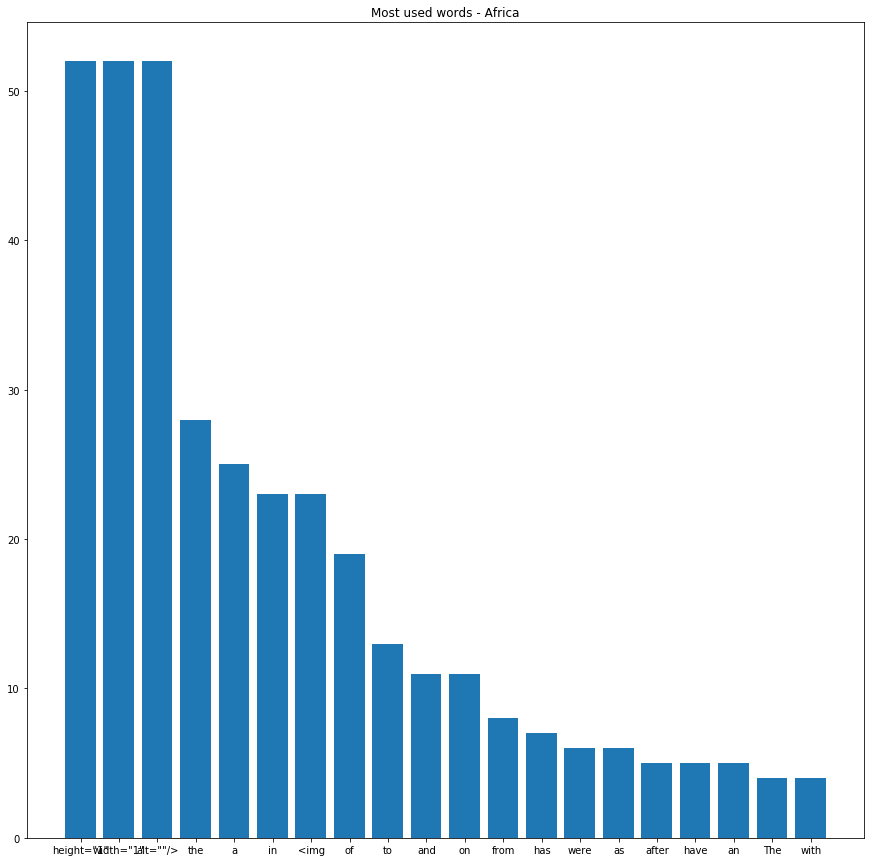

In [103]:
africa_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source = 'CNN - Africa\n'", engine)
Ct = Counter(" ".join(africa_feed['summary']).split()).most_common(20)

labels, values = zip(*Counter(" ".join(africa_feed['summary']).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words - Africa")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

([<matplotlib.axis.XTick at 0x1b561a20>,
 <a list of 20 Text xticklabel objects>)

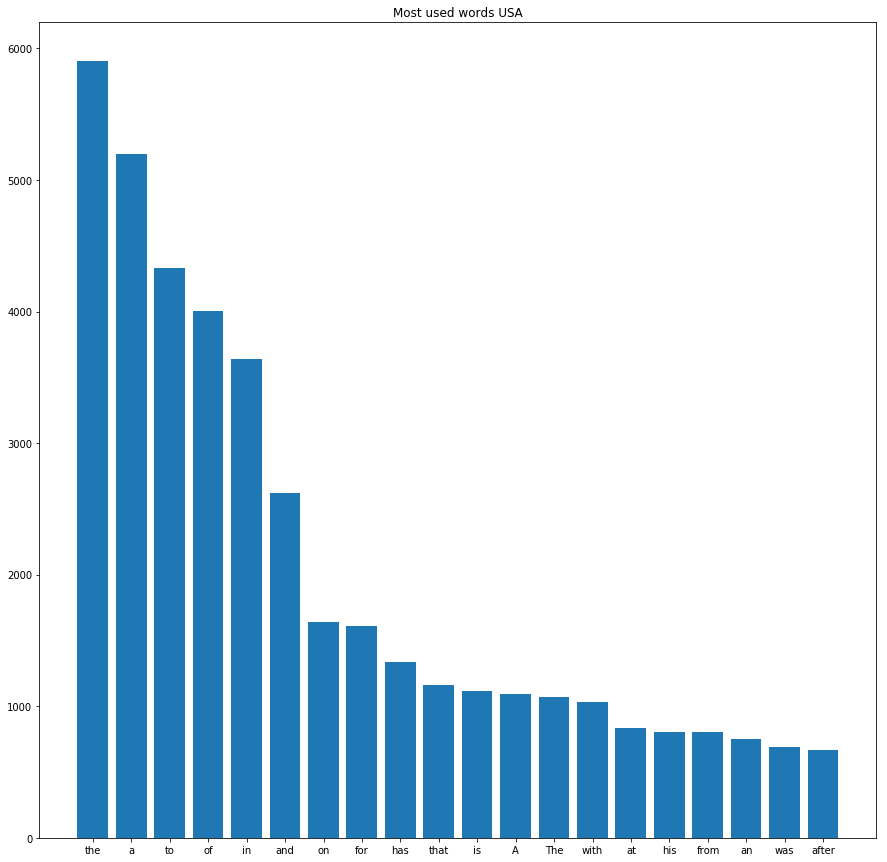

In [104]:
usa_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('Washington Post\n','ABC News - USA\n','CBS News - USA\n','NY Times\n','USA Today\n','Yahoo - USA\n','NewYorker\n','US News\n','LA Times - USA\n')", engine)
Ct = Counter(" ".join(usa_feed['summary']).split()).most_common(20)
labels, values = zip(*Counter(" ".join(usa_feed['summary']).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words USA")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

[('the', 103), ('height="1"', 72), ('width="1"', 72), ('alt=""/>', 72), ('of', 63), ('a', 54), ('in', 49), ('to', 48), ('and', 29), ('for', 23), ('on', 20), ('has', 20), ('an', 15), ('from', 14), ('that', 14), ('European', 13), ('about', 12), ('he', 11), ('their', 11), ('is', 10)]


([<matplotlib.axis.XTick at 0x2a183b70>,
 <a list of 20 Text xticklabel objects>)

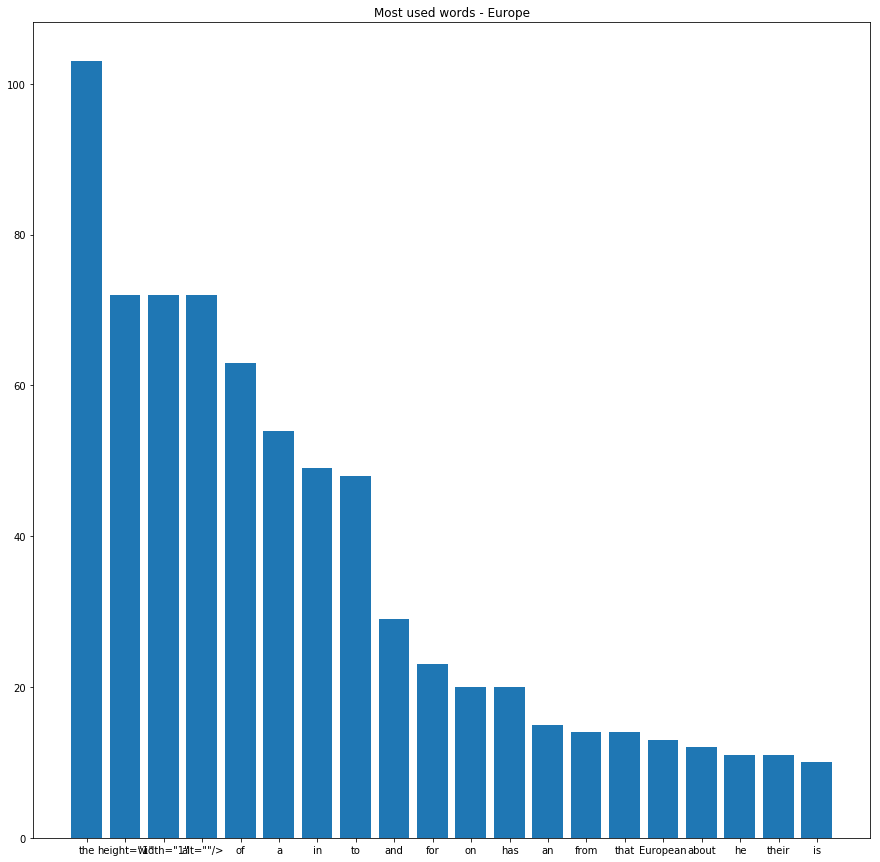

In [142]:
europe_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('BBC','The Daily Telegraph\n','CNN - Europe\n')", engine)
europe_feed = europe_feed[europe_feed.summary != 'default']
Ct = Counter(" ".join(europe_feed['summary']).split()).most_common(20)
print(Ct)
labels, values = zip(*Counter(" ".join(europe_feed['summary']).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8


plt.figure(figsize=(15,15))
plt.title("Most used words - Europe")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

([<matplotlib.axis.XTick at 0x1b1cee10>,
 <a list of 20 Text xticklabel objects>)

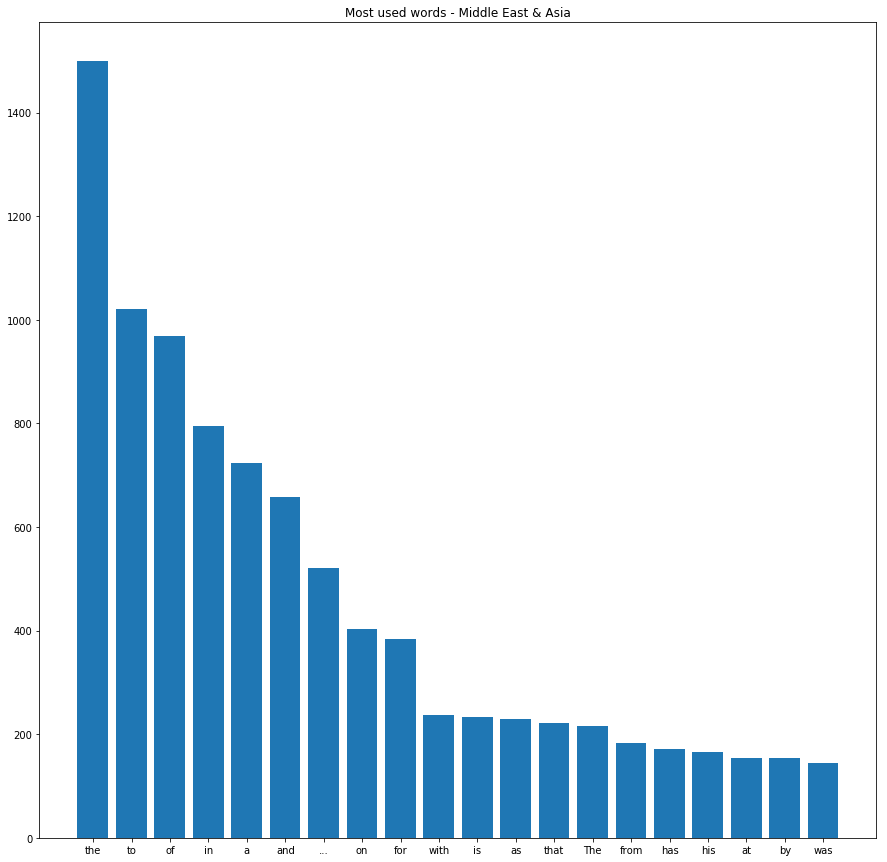

In [106]:
middleeast_asia = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('Japan Times\n','The Times of Israel\n','Times of India\n','China Daily\n','CNN - Asia\n','CNN - Middle East\n')", engine)
Ct = Counter(" ".join(middleeast_asia['summary']).split()).most_common(20)
labels, values = zip(*Counter(" ".join(middleeast_asia['summary']).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words - Middle East & Asia")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)